In [3]:
# Versão da Linguagem Python

from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook 3.9.7


In [5]:
# Instala o pacote watermark .
# Esse pacote é usado para gravar as versões de outros pacotes usados neste Jupyter Notebook
!pip install -q -U watermark

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregando os Dados

dadosRH = pd.read_csv('dadosRH.csv')
dadosRH.head()
dadosRH.shape

(54808, 11)

C:\Users\rq_so\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rq_so\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


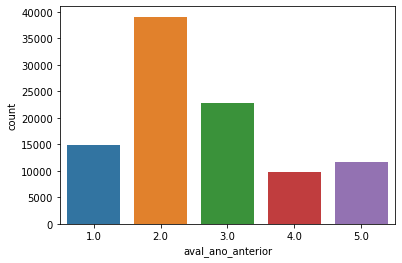

In [13]:
# Limpeza e Transformação de Dados
# (Manipular os dados e corrigir eventuais problemas)

dadosRH.isnull().sum()
dadosRH.groupby(['educacao']).count()
sns.countplot(dadosRH['educacao'])
dadosRH.groupby(['aval_ano_anterior']).count()
sns.countplot(dadosRH['aval_ano_anterior'])

# Aplicando imputação e preenchendo os valores ausentes

dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True)
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace = True)
dadosRH.isnull().sum()
dadosRH.groupby(['educacao']).count()
dadosRH.groupby(['aval_ano_anterior']).count()




In [15]:
# Vamos verificar o balanceamento de classe na variável "promovido"

dadosRH.groupby(['promovido']), count()
sns.countplot(dadosRH['promovido'])

df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

df_classe_majoritaria.shape
df_classe_minoritaria.shape


NameError: name 'count' is not defined

In [ ]:
# Upsample da classe minoritária

from skclearn.utils import resample
df_classe_minoritaria_upsampled(df_classe_minoritaria,
                                replace = True,
                                n_samples = 50140,
                                random_state = 150)

In [ ]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsampled])
dadosRH_balanceados.promovido.value_counts()
dadosRH_balanceados.info()
sns.countplot(dadosRH_balanceados['promovido'])

In [ ]:
# Salvando o dataset com os dados manipulados

dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding = "utf-8", index = False)

In [ ]:
# Carregando os Dados Modificados

dataset = pd.read_csv('dadosRH_modificado.csv')
dataset.head()

In [16]:
# Pergunta 1 - Qual a Correlação entre os Atributos dos Funcionários?

import matplotlib.pyplot as plt
import seaborn as sns

corr = dataset.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidths = 0.1)
plt.show()

NameError: name 'dataset' is not defined

In [17]:
# Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['tempo_servico'], color = 'green')
plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize = 15)
plt.xlabel('Tempo de Serviço em Anos', fontsize = 15)
plt.ylabel('Total')
plt.show()

NameError: name 'dataset' is not defined

In [ ]:
# Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?

import matplotlib.pyplot as plt
import seaborn as sns
dataset['aval_ano_anterior'].value.counts().sort_value().plot.bar(color = 'blue', figsize = (10,5))
plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 15)
plt.xlabel('Avaliações', fontsize = 15)
plt.ylabel('Total')
plt.show()


In [ ]:
# Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['idade'], color = 'magenta')
plt.title('Distribuição da Idade dos Funcionários', fontsize = 15)
plt.xlabel('Idade', fontsize = 15)
plt.ylabel('Total')
plt.show()

In [ ]:
# Pergunta 5 - Qual o Número de Treinamentos mais Frequente?

import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(dataset["numero_treinamentos"], color = 'red')
plt.title('Número de Treinamentos Feitos pelos Funcionários', fontsize = 15)
plt.xlabel('Número de Treinamentos', fontsize = 15)
plt.ylabel("Frequência")
plt.show()

In [ ]:
# Pergunta 6 - Qual a Proporção dos Funcionários por Canal de Recrutamento?

import matplotlib.pyplot as plt
import seaborn as sns

dataset['canal_recrutamento'].value_counts()
fatias = [55375, 42358, 2547]
labels = "Outro", "Outsorcing", "Indicação"
colors = ['purple', 'lime', 'yellow']
explode - [0, 0, 0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct - "%.2f%%")
plt.title('Percentual de Funcionários por Canal de Recrutamento', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
# Pergunta 7 - Qual a Relação entre a Promoção e a Avaliação do ano anterior?

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                   stacked = True,
                                                   figsize = (16,9),
                                                   color = ['blue', 'magenta'] )
plt.title('Relação entre Avaliação do Ano Anterior e a Promoção', fontsize = 15)
plt.xlabel('Avaliação do Ano Anterior', fontsize = 15)
plt.legend()
plt.show()